> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you

import pandas as pd
import numpy as np
import pandas as pd
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


df = pd.read_csv('tmdb-movies.csv')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# check which columns have missing values with info()


# check for duplicates in the data
sum(df.duplicated())




1

In [5]:
# drop duplicates
df.drop_duplicates(inplace=True)

sum(df.duplicated())


0

In [6]:
# confirm your correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [7]:
 df.drop(['homepage','runtime','revenue_adj','budget_adj','vote_count','release_date','overview','tagline','original_title','cast','id','keywords','imdb_id','production_companies','production_companies'],axis=1,inplace=True)

In [8]:
df.head()

popularity     budget     revenue          director  \
0   32.985763  150000000  1513528810   Colin Trevorrow   
1   28.419936  150000000   378436354     George Miller   
2   13.112507  110000000   295238201  Robert Schwentke   
3   11.173104  200000000  2068178225       J.J. Abrams   
4    9.335014  190000000  1506249360         James Wan   

                                      genres  vote_average  release_year  
0  Action|Adventure|Science Fiction|Thriller           6.5          2015  
1  Action|Adventure|Science Fiction|Thriller           7.1          2015  
2         Adventure|Science Fiction|Thriller           6.3          2015  
3   Action|Adventure|Science Fiction|Fantasy           7.5          2015  
4                      Action|Crime|Thriller           7.3          2015

In [9]:
df.fillna(df.mean(),inplace=True)


In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10800 non-null float64
budget          10800 non-null int64
revenue         10800 non-null int64
director        10800 non-null object
genres          10800 non-null object
vote_average    10800 non-null float64
release_year    10800 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 675.0+ KB


In [30]:
gk = df.groupby(['release_year'])
  
gk.first()


popularity     budget     revenue  \
release_year                                      
1960            2.610362     806948    32000000   
1961            2.631987    4000000   215880014   
1962            3.170651    1100000    59600000   
1963            2.508235    2500000    78898765   
1964            3.153791    3500000   124900000   
1965            1.910465   11000000   141195658   
1966            1.227582     315000           0   
1967            2.550704    4000000   205843612   
1968            3.309196   12000000    56715371   
1969            1.778746    7000000    81974493   
1970            1.936962    4000000    55675257   
1971            3.072555    2200000    26589000   
1972            5.738034    6000000   245066411   
1973            2.272486   15000000    32056467   
1974            3.264571   13000000    47542841   
1975            3.258151    3000000   108981275   
1976            2.582657    1300000    28262574   
1977           12.037933   11000000   775398007   
1978            1.697618    6000000   181813770   
1979            4.935897   11000000   104931801   
1980            5.488441   18000000   538400000   
1981            4.578300   18000000   389925971   
1982            4.215642   28000000    32768670   
1983            4.828854   32350000   572700000   
1984            4.831966    6400000    78371200   
1985            6.095293   19000000   381109762   
1986            2.485419   18500000   131060248   
1987            3.474728   18000000    98235548   
1988            3.777441   28000000   140767956   
1989            4.143585   40000000   211343479   
1990            2.679627   65000000   261317921   
1991            3.852269   25000000   377350553   
1992            4.586426    1200000    14661007   
1993            2.571339   14600000    70906973   
1994            8.093754    8000000   213928762   
1995            4.765359   33000000   327311859   
1996            4.480733   75000000   816969268   
1997            6.668990          0           0   
1998            4.180540   60000000   264118201   
1999            8.947905   63000000   100853753   
2000            4.271452  103000000   457640427   
2001            8.575419   93000000   871368364   
2002            8.095275   79000000   926287400   
2003            7.122455   94000000  1118888979   
2004            5.827781  130000000   789804554   
2005            5.939927  150000000   895921036   
2006            5.838503   50000000   111340801   
2007            4.965391  300000000   961000000   
2008            8.466668  185000000  1001921825   
2009            9.432768  237000000  2781505847   
2010            9.363643  160000000   825500000   
2011            8.411577          0           0   
2012            7.637767  220000000  1519557910   
2013            6.112766  150000000  1274219009   
2014           24.949134  165000000   621752480   
2015           32.985763  150000000  1513528810   

                                                       director  \
release_year                                                      
1960                                           Alfred Hitchcock   
1961          Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman   
1962                                              Terence Young   
1963                                              Terence Young   
1964                                               Guy Hamilton   
1965                                              Terence Young   
1966                                     Chuck Jones|Ben Washam   
1967                                        Wolfgang Reitherman   
1968                                            Stanley Kubrick   
1969                                              Peter R. Hunt   
1970                                        Wolfgang Reitherman   
1971                                            Stanley Kubrick   
1972                                       Francis Ford Coppola   
1973                                        Wolfga

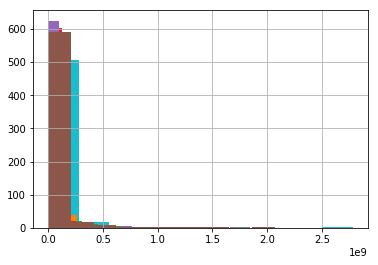

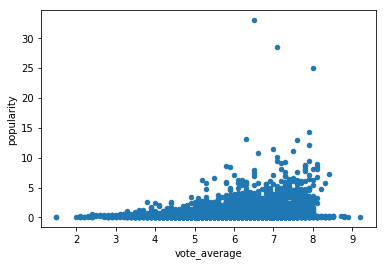

In [29]:
df.plot(x="vote_average", y="popularity", kind="scatter");

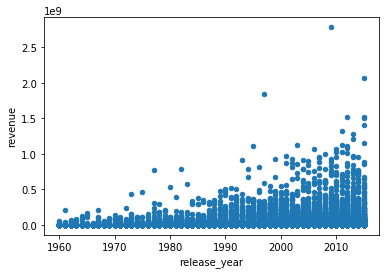

In [12]:
df.plot(x="release_year", y="revenue", kind="scatter");

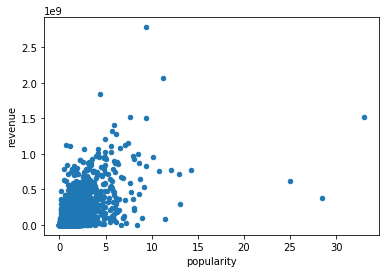

In [13]:
df.plot(x="popularity", y="revenue", kind="scatter");

In [14]:
action = df.query('genres == "Action"')


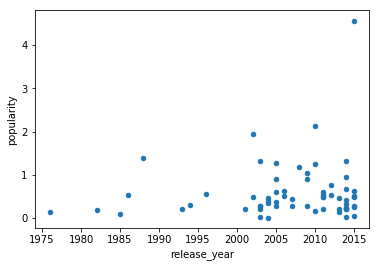

In [15]:
action.plot(x="release_year", y="popularity", kind="scatter");

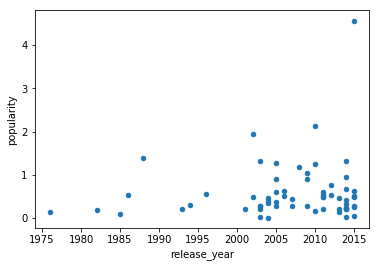

In [23]:
action.plot(x="release_year", y="popularity", kind="scatter");

In [42]:
a=action.groupby('release_year')
a.first()


popularity     budget    revenue               director  genres  \
release_year                                                                    
1976            0.126723          0          0            Paul Bartel  Action   
1982            0.174119          0          0         Cheung Yam-Yim  Action   
1985            0.092747          0          0        Matthew Robbins  Action   
1986            0.523347          0    4662137        Corey Yuen Kwai  Action   
1988            1.392581    1500000   11806119            Newt Arnold  Action   
1993            0.207999    6000000    3283371        Sheldon Lettich  Action   
1994            0.310592          0    1907743            Gordon Chan  Action   
1996            0.544411          0          0             Daniel Lee  Action   
2001            0.208670   94000000   54744738           Renny Harlin  Action   
2002            1.936728   70000000  277448382              Rob Cohen  Action   
2003            1.318505   29000000   98185582       Robert Rodriguez  Action   
2004            0.450274    7200000          0         Michael Keusch  Action   
2005            1.270018   43000000   56681566             Rob Bowman  Action   
2006            0.632875   70000000   55011732           Andrew Davis  Action   
2007            0.431510   45000000   30822861          Marcus Nispel  Action   
2008            1.172718   35000000   85416905             John Moore  Action   
2009            1.043738   60000000   87784194        Kevin Macdonald  Action   
2010            2.118310  200000000  310669540           Ridley Scott  Action   
2011            0.598246    5000000          0   Lawrence Silverstein  Action   
2012            0.767413   15000000   15608545                    RZA  Action   
2013            0.470299          0    3302463        Prachya Pinkaew  Action   
2014            1.312103   25000000          0            Nick Powell  Action   
2015            4.566713  150000000  682330139  Christopher McQuarrie  Action   

              vote_average  
release_year                
1976                   5.9  
1982                   7.2  
1985                   7.1  
1986                   6.2  
1988                   6.4  
1993                   6.7  
1994                   7.5  
1996                   5.8  
2001                   4.8  
2002                   5.7  
2003                   6.1  
2004                   4.9  
2005                   5.0  
2006                   7.0  
2007                   5.4  
2008                   5.3  
2009                   6.6  
2010                   6.1  
2011                   4.1  
2012                   5.1  
2013                   5.1  
2014                   4.4  
2015                   7.1

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [12]:
#Do action movies become more popular

#yes..the Action movies comes popular from year to year


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])